## Kendrick Mass Defect Spectrum and van Krevlen plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.rdMolDescriptors import CalcMolFormula, GetAtomFeatures

I used the same definition of kendrick mass as in

Hughey, Christine A.; Hendrickson, Christopher L.; Rodgers, Ryan P.; Marshall, Alan G.; Qian, Kuangnan (2001). Kendrick Mass Defect Spectrum:  A Compact Visual Analysis for Ultrahigh-Resolution Broadband Mass Spectra. *Analytical Chemistry*, **73(19)**, 4676–4681. [doi:10.1021/ac010560w](https://doi.org/10.1021/ac010560w)

In [2]:
ch_2 = MolFromSmiles("[CH2]")
ch_2_mass = ExactMolWt(ch_2)
print(f'Mass of CH2: {ch_2_mass}')

Mass of CH2: 14.015650063999999


In [3]:
# factor to convert IUPAC mass to kendrick mass
conv_factor = 14.00000/ch_2_mass

In [4]:
'''gens_list = []
kendrick_wt_list = []
nominal_wt_list = []'''

# an item at index 'i' in each of the lists above corresponds to the same molecule
glu_data = pd.read_csv('../main/glucose/glucose_degradation_output_10mar.txt', sep='\t',
                          names=['Gen', 'SMILES'])
mol_list = [MolFromSmiles(smi) for smi in glu_data['SMILES']]

glu_data['Generation'] = [int(gen[1:]) for gen in glu_data['Gen']]
glu_data['IUPAC Wt'] = [ExactMolWt(mol) for mol in mol_list]
glu_data['m/z'] = glu_data['IUPAC Wt'] - 1.007276
glu_data['Kendrick Mass'] = glu_data['m/z']*conv_factor
glu_data['Nominal KM'] = round(glu_data['Kendrick Mass'])

# we multiply the KMD by 1000 as convetionally seen in MS data
glu_data['KMD'] = 1000*(glu_data['Nominal KM'] - glu_data['Kendrick Mass'])

# since we're only worried about the mass defect and not the exact species, we can drop
# duplicate KMD and Nominal KMs. Let's
glu_clean = glu_data.drop_duplicates(['Kendrick Mass'], keep='first')
print(len(glu_clean))
glu_clean

168


,Gen,SMILES,Generation,IUPAC Wt,m/z,Kendrick Mass,Nominal KM,KMD
0,G0,C(C(C(C(C(CO)O)O)O)O)=O,0,180.063388,179.056112,178.856176,179.0,143.824367
1,G0,O,0,18.010565,17.003289,16.984303,17.0,15.697418
2,G1,C(CO)=O,1,60.021129,59.013853,58.947958,59.0,52.042297
3,G1,C(C(C(CO)O)O)=O,1,120.042259,119.034983,118.902067,119.0,97.933332
5,G1,C(C(C(C(C(CO)O)O)O)O)(O)=O,1,196.058303,195.051027,194.833230,195.0,166.769885
...,...,...,...,...,...,...,...,...
33056,G5,C1C(C=CC(C=1)=O)=O,5,108.021129,107.013853,106.894360,107.0,105.639745
33572,G5,C=CC(C=C(C=O)C=O)=O,5,138.031694,137.024418,136.871415,137.0,128.585262
33749,G5,C=CC(C=C(C=O)C(C=O)=O)=O,5,166.026609,165.019333,164.835070,165.0,164.930142
45318,G5,C(CC(C)C(CO)C(C)O)=O,5,160.109944,159.102668,158.925012,159.0,74.987815


In [5]:
wet_dex = pd.read_csv('dextrose_wet_impcols.csv')
wet_dex['Nominal KM'] = round(wet_dex['Kendrick Mass'])
print(296.10679*conv_factor)
wet_dex

295.7761531623811


,Peak Number,Mass,Rel. Abundance,Kendrick Mass,Nom. Mass,KMD,Molecular Formula,Nominal KM
0,1,296.10679,7.4044,295.7762,296.0,224.0,No Hit,296.0
1,2,514.28440,3.1185,513.7102,514.0,290.0,NaN,514.0
2,3,360.12282,1.9340,359.7207,360.0,279.0,No Hit,360.0
3,4,444.14395,0.0246,443.6480,444.0,352.0,No Hit,444.0
4,5,458.15959,1.5455,457.6480,458.0,352.0,No Hit,458.0
...,...,...,...,...,...,...,...,...
3701,2532,108.91753,0.0084,108.7959,109.0,204.0,No Hit,109.0
3702,2533,118.59676,0.0078,118.4643,119.0,-464.0,No Hit,118.0
3703,2534,152.38554,0.0075,152.2154,153.0,-215.0,No Hit,152.0
3704,2535,132.57425,0.0069,132.4262,133.0,-426.0,No Hit,132.0


In [6]:
import matplotlib.patches as patches

/home/aayush/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


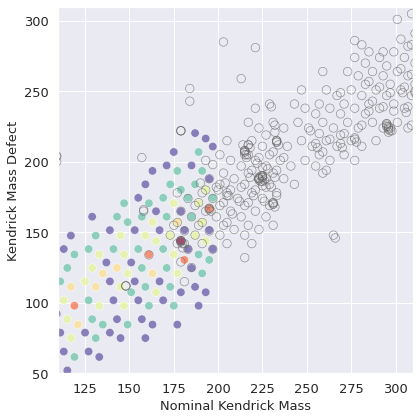

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.minorticks_on()

sns.set_theme()

spectral_palette = ['#9E0142', '#F46D43', '#FEE08B', '#E6F598', '#66C2A5', '#5E4FA2']
#['red', 'orange', 'yellow', 'yellowgreen', 'green', 'violet']

'''for gen, gen_data in glu_clean.groupby('Generation'):
    plt.scatter(gen_data['Nominal KM'], gen_data['KMD'], c='', ec=spectral_palette[gen],
                zorder=6-gen, label=f'G{gen}', s=64)'''
sns.scatterplot(data=glu_clean, x='Nominal KM', y='KMD', s=72, #ec='k', #color='w', label='Model'
                hue='Generation', palette='Spectral', legend=False, alpha=0.7
               )

sns.scatterplot(data=wet_dex, x='Nominal KM', y='KMD', color='', ec='dimgray', zorder=2, s=72, alpha=0.7,
                       #label='FT-ICR-MS'
               )

rect = patches.Rectangle((110, 50), 200, 260, fc='none', ec='r', ls='--')
ax.add_patch(rect)
# adjustments

hans, labs = ax.get_legend_handles_labels()
labs[:-1] = [f'G{i}' for i in range(6)]

'''plt.legend(fontsize=13, loc='lower right', handles=hans, labels=labs, title='Generation',
          title_fontsize=13, handletextpad=0.1, markerscale=1.3)
plt.xlim(-25, 750)
plt.ylim(-25, 500)'''

plt.xlim(110, 310)
plt.ylim(50, 310)
plt.xlabel('Nominal Kendrick Mass', fontsize=13)
plt.ylabel('Kendrick Mass Defect', fontsize=13)

ax.tick_params(axis='both', labelsize=13)

plt.tight_layout()
plt.savefig('kmd_spectrum.jpg', dpi=300)

In [8]:
# legacy code
'''with open('../main/glucose/glucose_degradation_output.txt') as glu_out:
    contents = glu_out.readlines()
    for line in contents:
        comps = line.split("\t")
        gen_num = int(comps[0][1])
        mol = MolFromSmiles(comps[1])
        iupac_wt = ExactMolWt(mol)
        kendrick_wt = iupac_wt * conv_factor
        
        gens_list.append(gen_num)
        kendrick_wt_list.append(kendrick_wt)
        nominal_wt_list.append(round(kendrick_wt))'''

'with open(\'../main/glucose/glucose_degradation_output.txt\') as glu_out:\n    contents = glu_out.readlines()\n    for line in contents:\n        comps = line.split("\t")\n        gen_num = int(comps[0][1])\n        mol = MolFromSmiles(comps[1])\n        iupac_wt = ExactMolWt(mol)\n        kendrick_wt = iupac_wt * conv_factor\n        \n        gens_list.append(gen_num)\n        kendrick_wt_list.append(kendrick_wt)\n        nominal_wt_list.append(round(kendrick_wt))'

In [9]:
# another definition of KMD used in spectrometers involves multiplying by 1000 as a scaling factor
#kendrick_wt_defects = [1000*(nominal_wt_list[i] - kendrick_wt_list[i]) for i in range(len(kendrick_wt_list))]

NameError: name 'kendrick_wt_list' is not defined

Now, let's actually plot Kendrick Mass (x-axis) vs kendrick mass defect

unique weights in gen 5: 138, total wts 40512
unique defects in gen 5: 49, total defs 40512
unique weights in gen 4: 97, total wts 6837
unique defects in gen 4: 37, total defs 6837
unique weights in gen 3: 54, total wts 926
unique defects in gen 3: 27, total defs 926
unique weights in gen 2: 21, total wts 110
unique defects in gen 2: 14, total defs 110
unique weights in gen 1: 6, total wts 16
unique defects in gen 1: 6, total defs 16


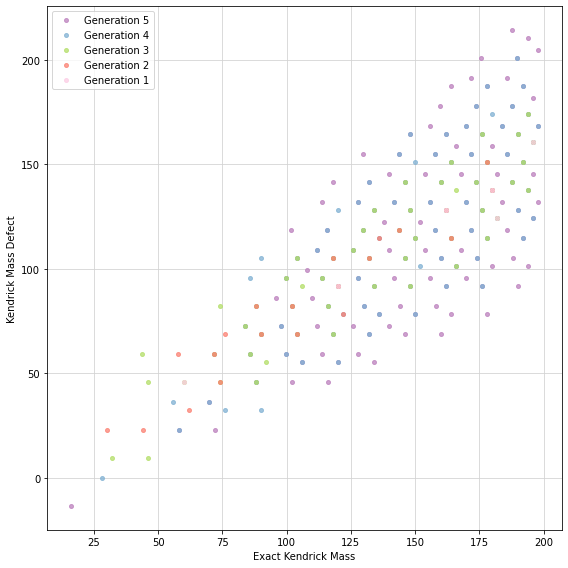

In [35]:
#colors_for_gen = ['red', 'gold', 'limegreen', 'royalblue', 'violet']
'''colors_for_gen = ['#FCCDE5', '#FB8072', '#B3DE68', '#80B1D3', '#BC80BD']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for gen in range(max(gens_list), 0, -1):
    weights_list = [kendrick_wt_list[i] for i in range(len(kendrick_wt_list)) if gens_list[i] == gen]
    defects_list = [kendrick_wt_defects[i] for i in range(len(kendrick_wt_list)) if gens_list[i] == gen]
    unique_wts = list(set(weights_list))
    # KMD corresponding to each wt in unique_wts
    defects = []
    for wt in unique_wts:
        ind = weights_list.index(wt)
        defects.append(defects_list[ind])
    print(f'unique weights in gen {gen}: {len(set(weights_list))}, total wts {len(weights_list)}')
    print(f'unique defects in gen {gen}: {len(set(defects_list))}, total defs {len(weights_list)}')
    plt.plot(unique_wts, defects, color=f'{colors_for_gen[gen-1]}', marker='o',
                 linestyle='', markersize=4, label=f'Generation {gen}', alpha=0.75)#
ax.legend(loc='upper left')
#ax.set_facecolor('whitesmoke')
plt.xlabel('Exact Kendrick Mass')
plt.ylabel('Kendrick Mass Defect')
plt.grid(color='lightgray')
fig.tight_layout()
plt.savefig('kendrick_mass_defect.jpg', dpi=300)
plt.show()'''